In [53]:
from __future__ import absolute_import, division, print_function, unicode_literals


# Import TensorFlow and TensorFlow Datasets
import tensorflow as tf
import tensorflow_datasets as tfds
tfds.disable_progress_bar()

# Helper libraries
import math
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


print(tf.__version__)

# This will go away in the future.
# If this gives an error, you might be running TensorFlow 2 or above
# If so, then just comment out this line and run this cell again
tf.enable_eager_execution()  

1.14.0


In [95]:
import logging
logger = tf.get_logger()
logger.setLevel(logging.ERROR)

In [96]:
dataset, metadata = tfds.load('fashion_mnist', as_supervised=True, with_info=True)
train_dataset, test_dataset = dataset['train'], dataset['test']

In [97]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 
               'Sandal',      'Shirt',   'Sneaker',  'Bag',   'Ankle boot']

In [98]:
num_train_examples = metadata.splits['train'].num_examples
num_test_examples = metadata.splits['test'].num_examples
print("Number of training examples: {}".format(num_train_examples))
print("Number of test examples:     {}".format(num_test_examples))

Number of training examples: 60000
Number of test examples:     10000


In [99]:
def normalize(images, labels):
  images = tf.cast(images, tf.float32)
  images /= 255
  return images, labels

# The map function applies the normalize function to each element in the train
# and test datasets
train_dataset =  train_dataset.map(normalize)
test_dataset  =  test_dataset.map(normalize)

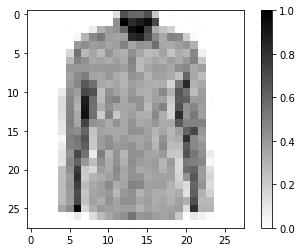

In [100]:
for image, label in test_dataset.take(1):
    break
image = image.numpy().reshape((28,28))

# Plot the image - voila a piece of fashion clothing
plt.figure()
plt.imshow(image, cmap=plt.cm.binary)
plt.colorbar()
plt.grid(False)
plt.show()

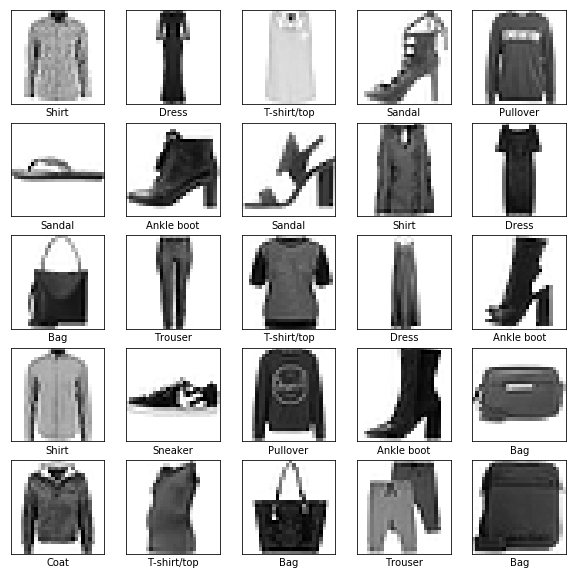

In [101]:
plt.figure(figsize=(10,10))
i = 0
for (image, label) in test_dataset.take(25):
    image = image.numpy().reshape((28,28))
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(image, cmap=plt.cm.binary)
    plt.xlabel(class_names[label])
    i += 1
plt.show()

In [102]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28, 1)),
    tf.keras.layers.Dense(256, activation=tf.nn.relu),
    tf.keras.layers.Dense(128, activation=tf.nn.relu),
    tf.keras.layers.Dense(10,  activation=tf.nn.softmax)
])

In [103]:
model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [104]:
BATCH_SIZE = 32
train_dataset = train_dataset.repeat().shuffle(num_train_examples).batch(BATCH_SIZE)
test_dataset = test_dataset.batch(BATCH_SIZE)

In [105]:
model.fit(train_dataset, epochs=3, steps_per_epoch=math.ceil(num_train_examples/BATCH_SIZE))

Epoch 1/3
1875/1875 [==============================] - ETA: 2:16:41 - loss: 2.3222 - acc: 0.25 - ETA: 13:46 - loss: 1.8805 - acc: 0.4500 - ETA: 6:55 - loss: 1.5137 - acc: 0.5531 - ETA: 4:29 - loss: 1.3182 - acc: 0.593 - ETA: 3:20 - loss: 1.1835 - acc: 0.632 - ETA: 2:39 - loss: 1.0943 - acc: 0.649 - ETA: 2:15 - loss: 1.0637 - acc: 0.652 - ETA: 1:55 - loss: 1.0222 - acc: 0.661 - ETA: 1:42 - loss: 0.9940 - acc: 0.670 - ETA: 1:31 - loss: 0.9561 - acc: 0.680 - ETA: 1:22 - loss: 0.9191 - acc: 0.689 - ETA: 1:15 - loss: 0.8904 - acc: 0.699 - ETA: 1:08 - loss: 0.8654 - acc: 0.708 - ETA: 1:03 - loss: 0.8363 - acc: 0.717 - ETA: 58s - loss: 0.8110 - acc: 0.725 - ETA: 54s - loss: 0.7982 - acc: 0.72 - ETA: 51s - loss: 0.7836 - acc: 0.73 - ETA: 48s - loss: 0.7704 - acc: 0.73 - ETA: 45s - loss: 0.7584 - acc: 0.74 - ETA: 43s - loss: 0.7486 - acc: 0.74 - ETA: 41s - loss: 0.7373 - acc: 0.74 - ETA: 39s - loss: 0.7319 - acc: 0.75 - ETA: 38s - loss: 0.7228 - acc: 0.75 - ETA: 36s - loss: 0.7118 - acc: 0.75 -

1875/1875 [==============================] - ETA: 1:07 - loss: 0.6470 - acc: 0.750 - ETA: 16s - loss: 0.4342 - acc: 0.834 - ETA: 12s - loss: 0.4060 - acc: 0.85 - ETA: 10s - loss: 0.3793 - acc: 0.86 - ETA: 10s - loss: 0.4142 - acc: 0.85 - ETA: 10s - loss: 0.3963 - acc: 0.86 - ETA: 9s - loss: 0.3829 - acc: 0.8647 - ETA: 9s - loss: 0.3786 - acc: 0.865 - ETA: 9s - loss: 0.3755 - acc: 0.864 - ETA: 9s - loss: 0.3706 - acc: 0.866 - ETA: 9s - loss: 0.3776 - acc: 0.864 - ETA: 9s - loss: 0.3719 - acc: 0.866 - ETA: 9s - loss: 0.3729 - acc: 0.866 - ETA: 9s - loss: 0.3685 - acc: 0.867 - ETA: 8s - loss: 0.3696 - acc: 0.867 - ETA: 8s - loss: 0.3736 - acc: 0.864 - ETA: 8s - loss: 0.3776 - acc: 0.862 - ETA: 8s - loss: 0.3756 - acc: 0.863 - ETA: 8s - loss: 0.3734 - acc: 0.865 - ETA: 8s - loss: 0.3682 - acc: 0.867 - ETA: 8s - loss: 0.3706 - acc: 0.865 - ETA: 8s - loss: 0.3744 - acc: 0.863 - ETA: 8s - loss: 0.3750 - acc: 0.861 - ETA: 8s - loss: 0.3729 - acc: 0.863 - ETA: 8s - loss: 0.3720 - acc: 0.863 - E

1875/1875 [==============================] - ETA: 1:09 - loss: 0.1947 - acc: 0.906 - ETA: 13s - loss: 0.2700 - acc: 0.895 - ETA: 12s - loss: 0.2834 - acc: 0.88 - ETA: 11s - loss: 0.2894 - acc: 0.88 - ETA: 11s - loss: 0.2977 - acc: 0.88 - ETA: 11s - loss: 0.3122 - acc: 0.87 - ETA: 11s - loss: 0.3156 - acc: 0.87 - ETA: 10s - loss: 0.3230 - acc: 0.87 - ETA: 10s - loss: 0.3187 - acc: 0.88 - ETA: 10s - loss: 0.3191 - acc: 0.88 - ETA: 10s - loss: 0.3214 - acc: 0.87 - ETA: 10s - loss: 0.3218 - acc: 0.87 - ETA: 9s - loss: 0.3195 - acc: 0.8794 - ETA: 9s - loss: 0.3186 - acc: 0.878 - ETA: 9s - loss: 0.3179 - acc: 0.879 - ETA: 9s - loss: 0.3160 - acc: 0.880 - ETA: 9s - loss: 0.3151 - acc: 0.882 - ETA: 9s - loss: 0.3184 - acc: 0.880 - ETA: 9s - loss: 0.3200 - acc: 0.880 - ETA: 9s - loss: 0.3200 - acc: 0.881 - ETA: 9s - loss: 0.3198 - acc: 0.880 - ETA: 9s - loss: 0.3226 - acc: 0.878 - ETA: 9s - loss: 0.3224 - acc: 0.877 - ETA: 8s - loss: 0.3237 - acc: 0.877 - ETA: 8s - loss: 0.3256 - acc: 0.876 - E

In [106]:
loss, acc = model.evaluate(test_dataset)
print("\nAccuracy", acc)

    199/Unknown - 0s 67ms/step - loss: 0.3163 - acc: 0.875 - 0s 36ms/step - loss: 0.2946 - acc: 0.890 - 0s 26ms/step - loss: 0.3343 - acc: 0.854 - 0s 22ms/step - loss: 0.3006 - acc: 0.882 - 0s 19ms/step - loss: 0.2639 - acc: 0.900 - 0s 17ms/step - loss: 0.2639 - acc: 0.895 - 0s 16ms/step - loss: 0.2474 - acc: 0.901 - 0s 15ms/step - loss: 0.2927 - acc: 0.886 - 0s 14ms/step - loss: 0.3269 - acc: 0.878 - 0s 13ms/step - loss: 0.3137 - acc: 0.884 - 0s 12ms/step - loss: 0.3311 - acc: 0.872 - 0s 12ms/step - loss: 0.3342 - acc: 0.869 - 0s 11ms/step - loss: 0.3149 - acc: 0.877 - 0s 11ms/step - loss: 0.3083 - acc: 0.879 - 0s 10ms/step - loss: 0.3096 - acc: 0.879 - 0s 10ms/step - loss: 0.3127 - acc: 0.875 - 0s 10ms/step - loss: 0.3131 - acc: 0.876 - 0s 10ms/step - loss: 0.3172 - acc: 0.875 - 0s 10ms/step - loss: 0.3143 - acc: 0.876 - 0s 10ms/step - loss: 0.3129 - acc: 0.878 - 0s 10ms/step - loss: 0.3255 - acc: 0.873 - 0s 10ms/step - loss: 0.3183 - acc: 0.876 - 0s 9ms/step - loss: 0.3184 - acc: 0.

    313/Unknown - 2s 8ms/step - loss: 0.3614 - acc: 0.86 - 2s 8ms/step - loss: 0.3610 - acc: 0.86 - 2s 8ms/step - loss: 0.3607 - acc: 0.86 - 2s 8ms/step - loss: 0.3604 - acc: 0.86 - 2s 8ms/step - loss: 0.3610 - acc: 0.86 - 2s 8ms/step - loss: 0.3607 - acc: 0.86 - 2s 8ms/step - loss: 0.3617 - acc: 0.86 - 2s 8ms/step - loss: 0.3611 - acc: 0.86 - 2s 8ms/step - loss: 0.3621 - acc: 0.86 - 2s 8ms/step - loss: 0.3616 - acc: 0.86 - 2s 8ms/step - loss: 0.3615 - acc: 0.86 - 2s 8ms/step - loss: 0.3603 - acc: 0.86 - 2s 8ms/step - loss: 0.3596 - acc: 0.86 - 2s 8ms/step - loss: 0.3587 - acc: 0.86 - 2s 8ms/step - loss: 0.3576 - acc: 0.86 - 2s 8ms/step - loss: 0.3571 - acc: 0.87 - 2s 8ms/step - loss: 0.3577 - acc: 0.86 - 2s 8ms/step - loss: 0.3578 - acc: 0.87 - 2s 8ms/step - loss: 0.3586 - acc: 0.86 - 2s 8ms/step - loss: 0.3580 - acc: 0.87 - 2s 8ms/step - loss: 0.3582 - acc: 0.87 - 2s 8ms/step - loss: 0.3584 - acc: 0.87 - 2s 8ms/step - loss: 0.3595 - acc: 0.86 - 2s 8ms/step - loss: 0.3592 - acc: 0.86 

In [107]:
for test_images, test_labels in test_dataset.take(1):
  test_images = test_images.numpy()
  test_labels = test_labels.numpy()
  predictions = model.predict(test_images)

In [108]:
predictions.shape

(32, 10)

In [109]:
predictions[0]

array([4.1430262e-06, 2.4835344e-08, 8.4559532e-04, 1.9797397e-05,
       6.4841928e-03, 4.8629975e-08, 9.9264365e-01, 1.2442626e-09,
       2.5224258e-06, 8.3312045e-08], dtype=float32)

In [110]:
np.argmax(predictions[0])

6

In [111]:
def plot_image(i, predictions_array, true_labels, images):
  predictions_array, true_label, img = predictions_array[i], true_labels[i], images[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  
  plt.imshow(img[...,0], cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'
  
  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array[i], true_label[i]
  plt.grid(False)
  plt.xticks([0,1,2,3,4,5,6,7,8,9])
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1]) 
  predicted_label = np.argmax(predictions_array)
 
  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

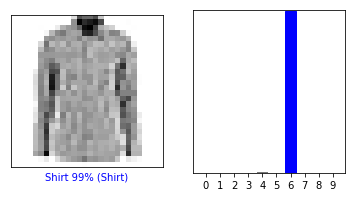

In [112]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions,  test_labels)

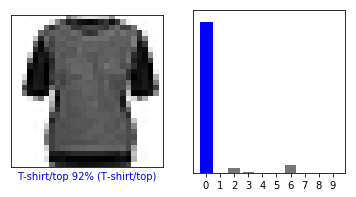

In [113]:
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions,  test_labels)

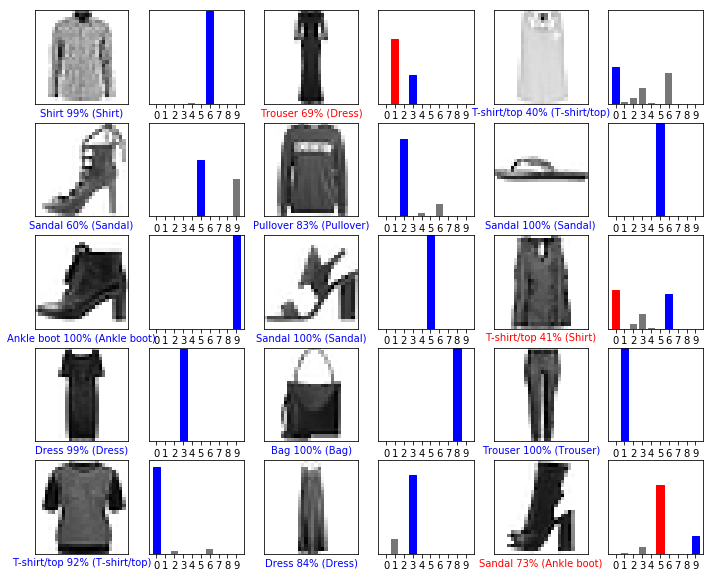

In [114]:
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions, test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions, test_labels)


In [115]:
img = test_images[0]

print(img.shape)

(28, 28, 1)


In [116]:
img = np.array([img])

print(img.shape)

(1, 28, 28, 1)


In [117]:
predictions_single = model.predict(img)

print(predictions_single)

[[4.1430180e-06 2.4835344e-08 8.4559410e-04 1.9797379e-05 6.4841770e-03
  4.8629882e-08 9.9264365e-01 1.2442603e-09 2.5224258e-06 8.3312045e-08]]


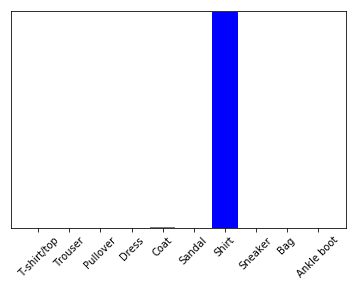

In [118]:
plot_value_array(0, predictions_single, test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)

In [119]:
np.argmax(predictions_single[0])

6